In [1]:
#Importing commonly used libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import tensorflow as tf
from keras import models, layers
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from keras.preprocessing.image import ImageDataGenerator

In [2]:
from google.colab import drive ##jupyter notebook executed using google colab
drive.mount('/content/drive')

Mounted at /content/drive


## Data Preprocessing


In [3]:
#  define training and test paths
train_dir = '/content/drive/MyDrive/Colab Notebooks/Emergency_Vehicles/train'
testing_dir = '/content/drive/MyDrive/Colab Notebooks/Emergency_Vehicles/test'

In [4]:
#  read sample image for visualization
image = cv2.imread(train_dir + '/7.jpg' )
print(image)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

[[[132 137 108]
  [127 132 101]
  [152 150 120]
  ...
  [ 80  79  65]
  [ 21  18   3]
  [ 35  32  17]]

 [[140 144 115]
  [122 124  94]
  [137 134 103]
  ...
  [ 59  57  46]
  [ 20  17   3]
  [ 66  63  49]]

 [[106 106  76]
  [ 81  79  49]
  [ 94  87  54]
  ...
  [ 39  36  28]
  [ 11   6   0]
  [ 63  58  49]]

 ...

 [[171 187 199]
  [175 191 203]
  [178 194 206]
  ...
  [166 173 176]
  [171 178 181]
  [169 176 179]]

 [[170 186 198]
  [175 191 203]
  [178 194 206]
  ...
  [173 180 183]
  [168 175 178]
  [165 172 175]]

 [[173 189 201]
  [178 194 206]
  [180 196 208]
  ...
  [180 187 190]
  [161 168 171]
  [153 160 163]]]


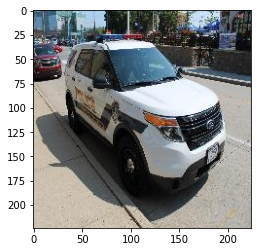

In [5]:
#  visualize sample image
plt.imshow(image)

In [6]:
#  create dataframe for the image names and their labels
train_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Emergency_Vehicles/train.csv')
test_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Emergency_Vehicles/test.csv')

In [7]:
#  preview train_df
train_df.head()

,image_names,emergency_or_not
0,1503.jpg,0
1,1420.jpg,0
2,1764.jpg,0
3,1356.jpg,0
4,1117.jpg,0


In [8]:
#  preview train_df
test_df.head()


,image_names,emergency_or_not
0,100.jpg,0
1,1000.jpg,0
2,1001.jpg,0
3,1004.jpg,0
4,1014.jpg,0


In [9]:
#  change labels to string
train_df['emergency_or_not'] = train_df['emergency_or_not'].astype(str)
test_df['emergency_or_not'] = test_df['emergency_or_not'].astype(str)

In [10]:
#  instantiate generators
image_gen = ImageDataGenerator(  
    rotation_range=20,# specifies the rotation to be 20% 
    width_shift_range=0.1, # specifies the width shift of 10% 
    height_shift_range=0.1,# specifies the height shift of 10% 
    shear_range=0.20, # crops part of the image  
    zoom_range=0.20, # #zooms the image by 20% 
    fill_mode='nearest', # fills using the nearest pixel  
    horizontal_flip=True, # Secifies the horizontal flip  
    rescale=1/255 # scales the image  
) 

In [11]:
#  make generators
train_generator=image_gen.flow_from_dataframe(dataframe=train_df[:1150], # specify the dataset used for trainin
                                              directory=train_dir, # specify the path to the directory 
                                              x_col='image_names', # specify the names of the images 
                                              y_col='emergency_or_not', # specifies the class labels 
                                              class_mode='binary', # specifies the kind of classification 
                                              target_size=(224,224), # specifies the dimension to resize the im
                                              batch_size=50 # defines the batch size  
                                             ) 

validation_generator=image_gen.flow_from_dataframe(dataframe=train_df[1150:], # specify the dataset used for tr
                                              directory=train_dir, # specify the path to the directory 
                                              x_col='image_names', # specify the names of the images 
                                              y_col='emergency_or_not', # specifies the class labels 
                                              class_mode='binary', # specifies the kind of classification 
                                              target_size=(224,224), # specifies the dimension to resize the im
                                              batch_size=50 # defines the batch size  
                                              ) 

Found 1150 validated image filenames belonging to 2 classes.
Found 496 validated image filenames belonging to 2 classes.


## Model Building

In [12]:
#  instantiate model
model = models.Sequential()
#  model architecture
model.add(layers.Conv2D(filters=8,
                        kernel_size=(3,3),
                        padding='same',
                        activation='relu',
                        input_shape=(224, 224, 3)))
model.add(layers.MaxPool2D(pool_size=(2,2)))

model.add(layers.Flatten())

model.add(layers.Dense(units=100, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(units=1, activation='sigmoid'))

In [13]:
#  instantiate model
model_2 = models.Sequential()
#  model architecture
model_2.add(layers.Conv2D(filters=8,
                        kernel_size=(3,3),
                        padding='same',
                        activation='relu',
                        input_shape=(224, 224, 3)))
model_2.add(layers.MaxPool2D(pool_size=(2,2)))

model_2.add(layers.Conv2D(filters=16,
                        kernel_size=(3,3),
                        padding='same',
                        activation='relu'))
model_2.add(layers.MaxPool2D(pool_size=(2,2)))

model_2.add(layers.Flatten())

model_2.add(layers.Dense(units=100, activation='relu'))
model_2.add(layers.Dropout(0.2))
model_2.add(layers.Dense(units=1, activation='sigmoid'))

In [14]:
#  model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 8)       224       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 8)      0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 100352)            0         
                                                                 
 dense (Dense)               (None, 100)               10035300  
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 101       
                                                        

In [15]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 224, 224, 8)       224       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 112, 112, 8)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 112, 112, 16)      1168      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 56, 56, 16)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 50176)             0         
                                                                 
 dense_2 (Dense)             (None, 100)              

In [16]:
#  compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics='accuracy')

In [17]:
history = model.fit_generator(
    train_generator,
    epochs=10,
    validation_data=validation_generator
)

<ipython-input-17-608d6bda8e97>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/10
23/23 [==============================] - 619s 27s/step - loss: 1.2162 - accuracy: 0.5896 - val_loss: 0.6718 - val_accuracy: 0.7117
Epoch 2/10
23/23 [==============================] - 45s 2s/step - loss: 0.6332 - accuracy: 0.6939 - val_loss: 0.5867 - val_accuracy: 0.7440
Epoch 3/10
23/23 [==============================] - 45s 2s/step - loss: 0.5896 - accuracy: 0.7330 - val_loss: 0.5304 - val_accuracy: 0.7782
Epoch 4/10
23/23 [==============================] - 46s 2s/step - loss: 0.5591 - accuracy: 0.7322 - val_loss: 0.5124 - val_accuracy: 0.7500
Epoch 5/10
23/23 [==============================] - 45s 2s/step - loss: 0.5201 - accuracy: 0.7687 - val_loss: 0.4825 - val_accuracy: 0.7823
Epoch 6/10
23/23 [==============================] - 45s 2s/step - loss: 0.5217 - accuracy: 0.7609 - val_loss: 0.4740 - val_accuracy: 0.7762
Epoch 7/10
23/23 [==============================] - 46s 2s/step - loss: 0.5003 - accuracy: 0.7652 - val_loss: 0.4368 - val_accuracy: 0.8065
Epoch 8/10
23/23 [

In [18]:
metrics = pd.DataFrame(history.history)
metrics

,loss,accuracy,val_loss,val_accuracy
0,1.216161,0.589565,0.671846,0.711694
1,0.633176,0.693913,0.586665,0.743952
2,0.589607,0.733043,0.530450,0.778226
3,0.559052,0.732174,0.512380,0.750000
4,0.520121,0.768696,0.482527,0.782258
5,0.521693,0.760870,0.474006,0.776210
6,0.500338,0.765217,0.436766,0.806452
7,0.465482,0.769565,0.436952,0.796371
8,0.466915,0.780000,0.465368,0.774194
9,0.451492,0.792174,0.464751,0.796371


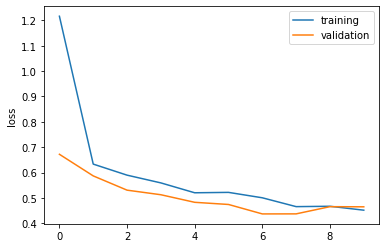

In [19]:
sns.lineplot(data=metrics, x=metrics.index, y='loss', label='training')
sns.lineplot(data=metrics, x=metrics.index, y='val_loss', label='validation')

In [20]:
#  compile model 2
model_2.compile(optimizer='adam',
                loss='binary_crossentropy',
                metrics='accuracy')

In [21]:
history_2 = model_2.fit_generator(
    train_generator,
    epochs=10,
    validation_data=validation_generator
)

<ipython-input-21-028f43ff418c>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history_2 = model_2.fit_generator(


Epoch 1/10
23/23 [==============================] - 54s 2s/step - loss: 0.7661 - accuracy: 0.5974 - val_loss: 0.6176 - val_accuracy: 0.6754
Epoch 2/10
23/23 [==============================] - 52s 2s/step - loss: 0.6082 - accuracy: 0.6774 - val_loss: 0.5437 - val_accuracy: 0.7359
Epoch 3/10
23/23 [==============================] - 52s 2s/step - loss: 0.5738 - accuracy: 0.7070 - val_loss: 0.5035 - val_accuracy: 0.7681
Epoch 4/10
23/23 [==============================] - 52s 2s/step - loss: 0.5381 - accuracy: 0.7348 - val_loss: 0.4785 - val_accuracy: 0.7681
Epoch 5/10
23/23 [==============================] - 52s 2s/step - loss: 0.5149 - accuracy: 0.7487 - val_loss: 0.4777 - val_accuracy: 0.7702
Epoch 6/10
23/23 [==============================] - 54s 2s/step - loss: 0.5054 - accuracy: 0.7652 - val_loss: 0.4558 - val_accuracy: 0.7883
Epoch 7/10
23/23 [==============================] - 53s 2s/step - loss: 0.4958 - accuracy: 0.7513 - val_loss: 0.4448 - val_accuracy: 0.8024
Epoch 8/10
23/23 [==

In [22]:
metrics_2 = pd.DataFrame(history_2.history)
metrics_2

,loss,accuracy,val_loss,val_accuracy
0,0.766099,0.597391,0.617564,0.675403
1,0.608208,0.677391,0.543732,0.735887
2,0.573812,0.706957,0.503478,0.768145
3,0.538061,0.734783,0.478466,0.768145
4,0.514880,0.748696,0.477681,0.770161
5,0.505416,0.765217,0.455842,0.788306
6,0.495814,0.751304,0.444816,0.802419
7,0.498642,0.753913,0.470026,0.774194
8,0.470098,0.787826,0.424077,0.796371
9,0.459217,0.799130,0.421302,0.804435


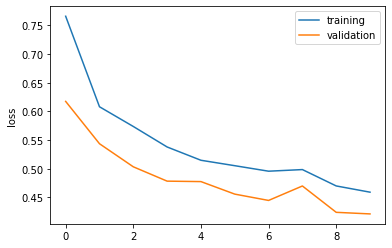

In [23]:
sns.lineplot(data=metrics_2, x=metrics_2.index, y='loss', label='training')
sns.lineplot(data=metrics_2, x=metrics_2.index, y='val_loss', label='validation')

## Model Testing

In [24]:
test_generator=image_gen.flow_from_dataframe(dataframe=test_df, # specify the dataset used for tr
                                              directory=testing_dir, # specify the path to the directory 
                                              x_col='image_names', # specify the names of the images ! ensure to us the same header as your csv
                                              y_col='emergency_or_not', # specifies the class labels ! ensure to us the same header as your csv
                                              class_mode='binary', # specifies the kind of classification 
                                              target_size=(224,224), # specifies the dimension to resize the im
                                              batch_size=706 # ! use the total number of images as the batch size (706 or thereabouts)  
                                              ) 

Found 706 validated image filenames belonging to 2 classes.


In [25]:
#  make predictions
predictions = model.predict(test_generator[0][0])

23/23 [==============================] - 5s 217ms/step


In [26]:
# raw predictions
predictions[:5]

array([[0.94311523],
       [0.96205103],
       [0.84038913],
       [0.27309942],
       [0.90586877]], dtype=float32)

In [27]:
#  conversion to binary
predictions = [0 if x[0] < 0.5 else 1 for x in predictions]

In [33]:
#  predictions in binary
predictions[:6]

[1, 1, 1, 0, 1, 1]

In [29]:
#  derive true labels
true_labels = test_generator[0][1]

In [30]:
#  derive classification report
print(classification_report(predictions, true_labels))

              precision    recall  f1-score   support

           0       0.72      0.86      0.78       337
           1       0.84      0.70      0.76       369

    accuracy                           0.77       706
   macro avg       0.78      0.78      0.77       706
weighted avg       0.79      0.77      0.77       706



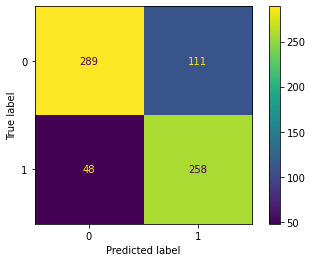

In [31]:
%matplotlib inline

cm = confusion_matrix(true_labels, predictions)

ax = ConfusionMatrixDisplay(cm)

ax.plot()

In [32]:
cm

array([[289, 111],
       [ 48, 258]])